# Importing the required Libraries for the analysis of the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time,datetime
import warnings
warnings.filterwarnings('ignore')

# Importing the Walmart Dataset

In [2]:
df=pd.read_csv('Walmart Data Analysis and Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Understanding the given Dataset

In [3]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.shape

(6435, 8)

In [8]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

# Checking if there are any missing or null values in the Dataset 

In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<AxesSubplot:>

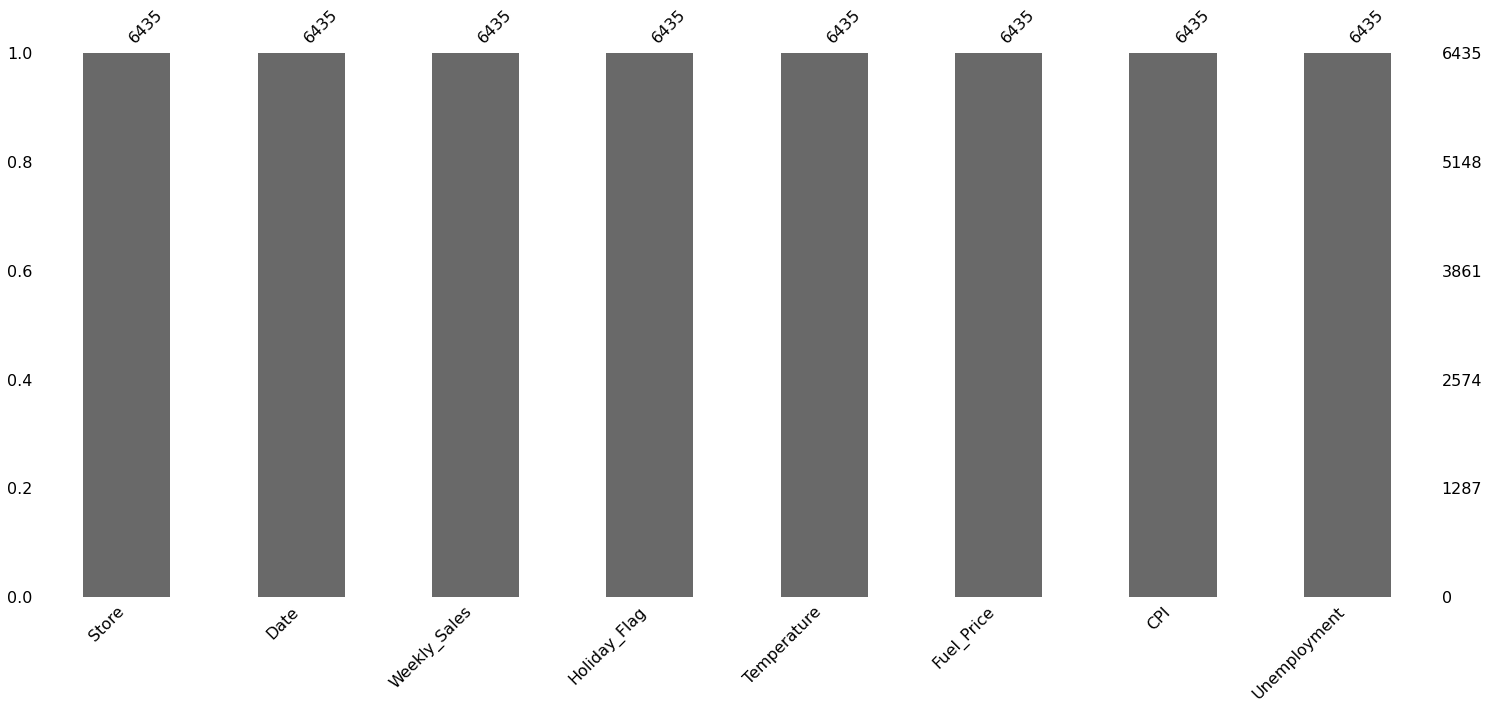

In [10]:
import missingno as msno
msno.bar(df)

# Gathering the maximum & minimum unemployement 

In [11]:
max_unemployement=df[df['Unemployment']==df['Unemployment'].max()]

In [12]:
min_unemployement=df[df['Unemployment']==df['Unemployment'].min()]

In [13]:
max_unemployement

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1607,12,01-10-2010,850936.26,0,85.20,3.001,126.234600,14.313
1608,12,08-10-2010,918335.68,0,71.82,3.013,126.279167,14.313
1609,12,15-10-2010,862419.84,0,75.00,2.976,126.326677,14.313
1610,12,22-10-2010,857883.46,0,68.85,3.014,126.381548,14.313
1611,12,29-10-2010,955294.70,0,61.09,3.016,126.436419,14.313
1612,12,05-11-2010,929690.71,0,65.49,3.129,126.491290,14.313
1613,12,12-11-2010,942475.24,0,57.79,3.130,126.546161,14.313
1614,12,19-11-2010,894493.70,0,58.18,3.161,126.607200,14.313
1615,12,26-11-2010,1601377.41,1,47.66,3.162,126.669267,14.313
1616,12,03-12-2010,1069533.17,0,43.33,3.041,126.731333,14.313


In [14]:
 min_unemployement

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
568,4,05-10-2012,2209835.43,0,63.07,3.620,131.075667,3.879
569,4,12-10-2012,2133026.07,0,57.11,3.603,131.108333,3.879
570,4,19-10-2012,2097266.85,0,64.46,3.610,131.149968,3.879
571,4,26-10-2012,2149594.46,0,63.64,3.514,131.193097,3.879


### CPI : The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services

# Adding year and month column for plotting graphs for better understanding of the dataset

In [15]:
df['Year'] = pd.DatetimeIndex(df['Date']).year 

In [16]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [17]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month'],
      dtype='object')

<BarContainer object of 6435 artists>

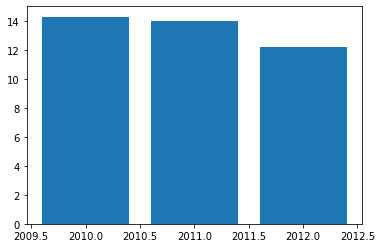

In [18]:
plt.bar(df['Year'],df['Unemployment'])

<BarContainer object of 6435 artists>

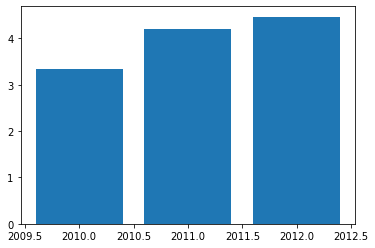

In [19]:
plt.bar(df['Year'],df['Fuel_Price'])

# Grouping Data by year

In [20]:
year_grouping=df.groupby('Year').mean() 

In [21]:
year_grouping

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
Year,,,,,,,,
2010,23.0,1.059670e+06,0.083333,60.266958,2.823767,168.101782,8.492714,7.000000
2011,23.0,1.046239e+06,0.076923,58.798530,3.561915,171.545716,8.082036,6.519231
2012,23.0,1.033660e+06,0.046512,63.362403,3.709776,175.498781,7.347964,5.837209


# Plotting graph of Unemployement vs Year

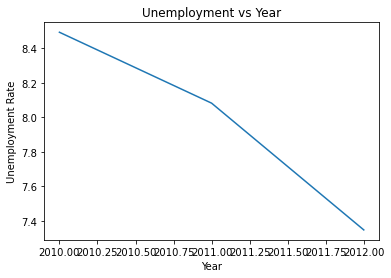

In [22]:
plt.title("Unemployment vs Year")
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.plot(year_grouping['Unemployment'])

### From the above graph it can be concluded that unemployement has been decreased over the years

# Plotting graph of Fuel price vs Year

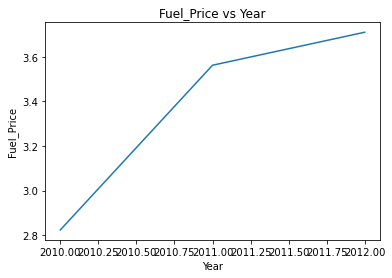

In [23]:
plt.title("Fuel_Price vs Year")
plt.xlabel('Year')
plt.ylabel('Fuel_Price')
plt.plot(year_grouping['Fuel_Price'])

### From the above graph it can be analysed that over the years the fuel price has increased drastically and in the year 2012 the fuel price peaked according to the analysed dataset

# Plotting graph of CPI vs Year

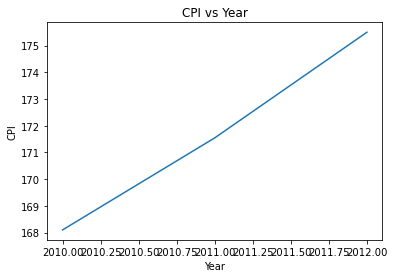

In [24]:
plt.title("CPI vs Year")
plt.xlabel('Year')
plt.ylabel('CPI')
plt.plot(year_grouping['CPI'])

### From the above graph it can be understood that CPI has had linear growth over the years 

# Segregating the dataset into 4 quaters for further analysis 

In [25]:
df['Quarter'] = pd.DatetimeIndex(df['Date']).quarter

In [26]:
Q1=df.loc[df['Quarter'] == 1]['CPI'].mean()
Q2=df.loc[df['Quarter'] == 2]['CPI'].mean()
Q3=df.loc[df['Quarter'] == 3]['CPI'].mean()
Q4=df.loc[df['Quarter'] == 4]['CPI'].mean()

In [27]:
Q=[Q1,Q2,Q3,Q4]

([<matplotlib.patches.Wedge at 0x23bcfb5bd00>,
 [Text(0.8136750942670127, 0.8126701920026157, 'Quarter1'),
  Text(-0.8120479686462045, 0.8142960742982696, 'Quarter2'),
  Text(-0.8131718086124108, -0.813173788115444, 'Quarter3'),
  Text(0.8137950756602966, -0.8125500445086766, 'Quarter4')],
 [Text(0.4599033141509202, 0.4593353259145218, '25.0%'),
  Text(-0.4589836344522025, 0.4602543028642393, '25.0%'),
  Text(-0.4596188483461452, -0.45961996719568565, '25.0%'),
  Text(0.45997112972103726, -0.4592674164614258, '25.0%')])

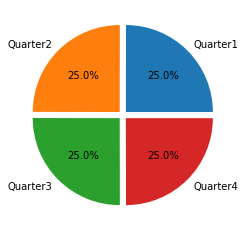

In [28]:
plt.pie(Q,labels=['Quarter1','Quarter2','Quarter3','Quarter4'],explode=[0.05,0.05,0.05,0.05],autopct='%.1f%%')

### It can be concluded from the above pie chart that the CPI is constant in all the quaters

# Plotting graph for Month vs Temperature

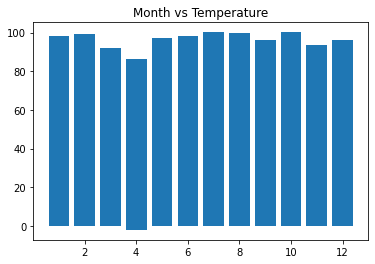

In [29]:
plt.bar(df['Month'],df['Temperature'])
plt.title('Month vs Temperature')
plt.show()

### From the above graph analysis we can conclude that the temperature has been fluctuating throught the year based on the given dataset. In the months of February,July,August & October the temperature has been the highest.

# Now plotting graph of Month vs Unemployement

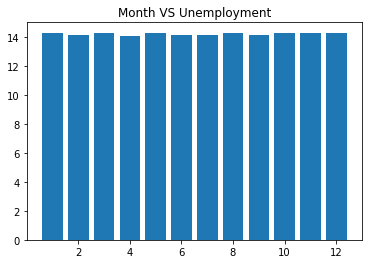

In [30]:
plt.bar(df['Month'],df['Unemployment'])
plt.title('Month VS Unemployment')
plt.show()

### It can be inferred from the above graph that the unemployement through all the months is almost the same

# Plotting graph of Month vs Weekly Sales

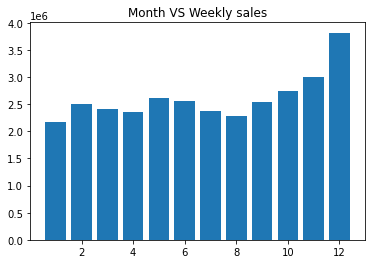

In [32]:
plt.bar(df['Month'],df['Weekly_Sales'])
plt.title('Month VS Weekly sales')
plt.show()

### It can be analysed that the weekly sales is at the maximum in the month of December and minimum during the month of January

# Plotting various types of graphs for each column while comparing it with the remaining columns 

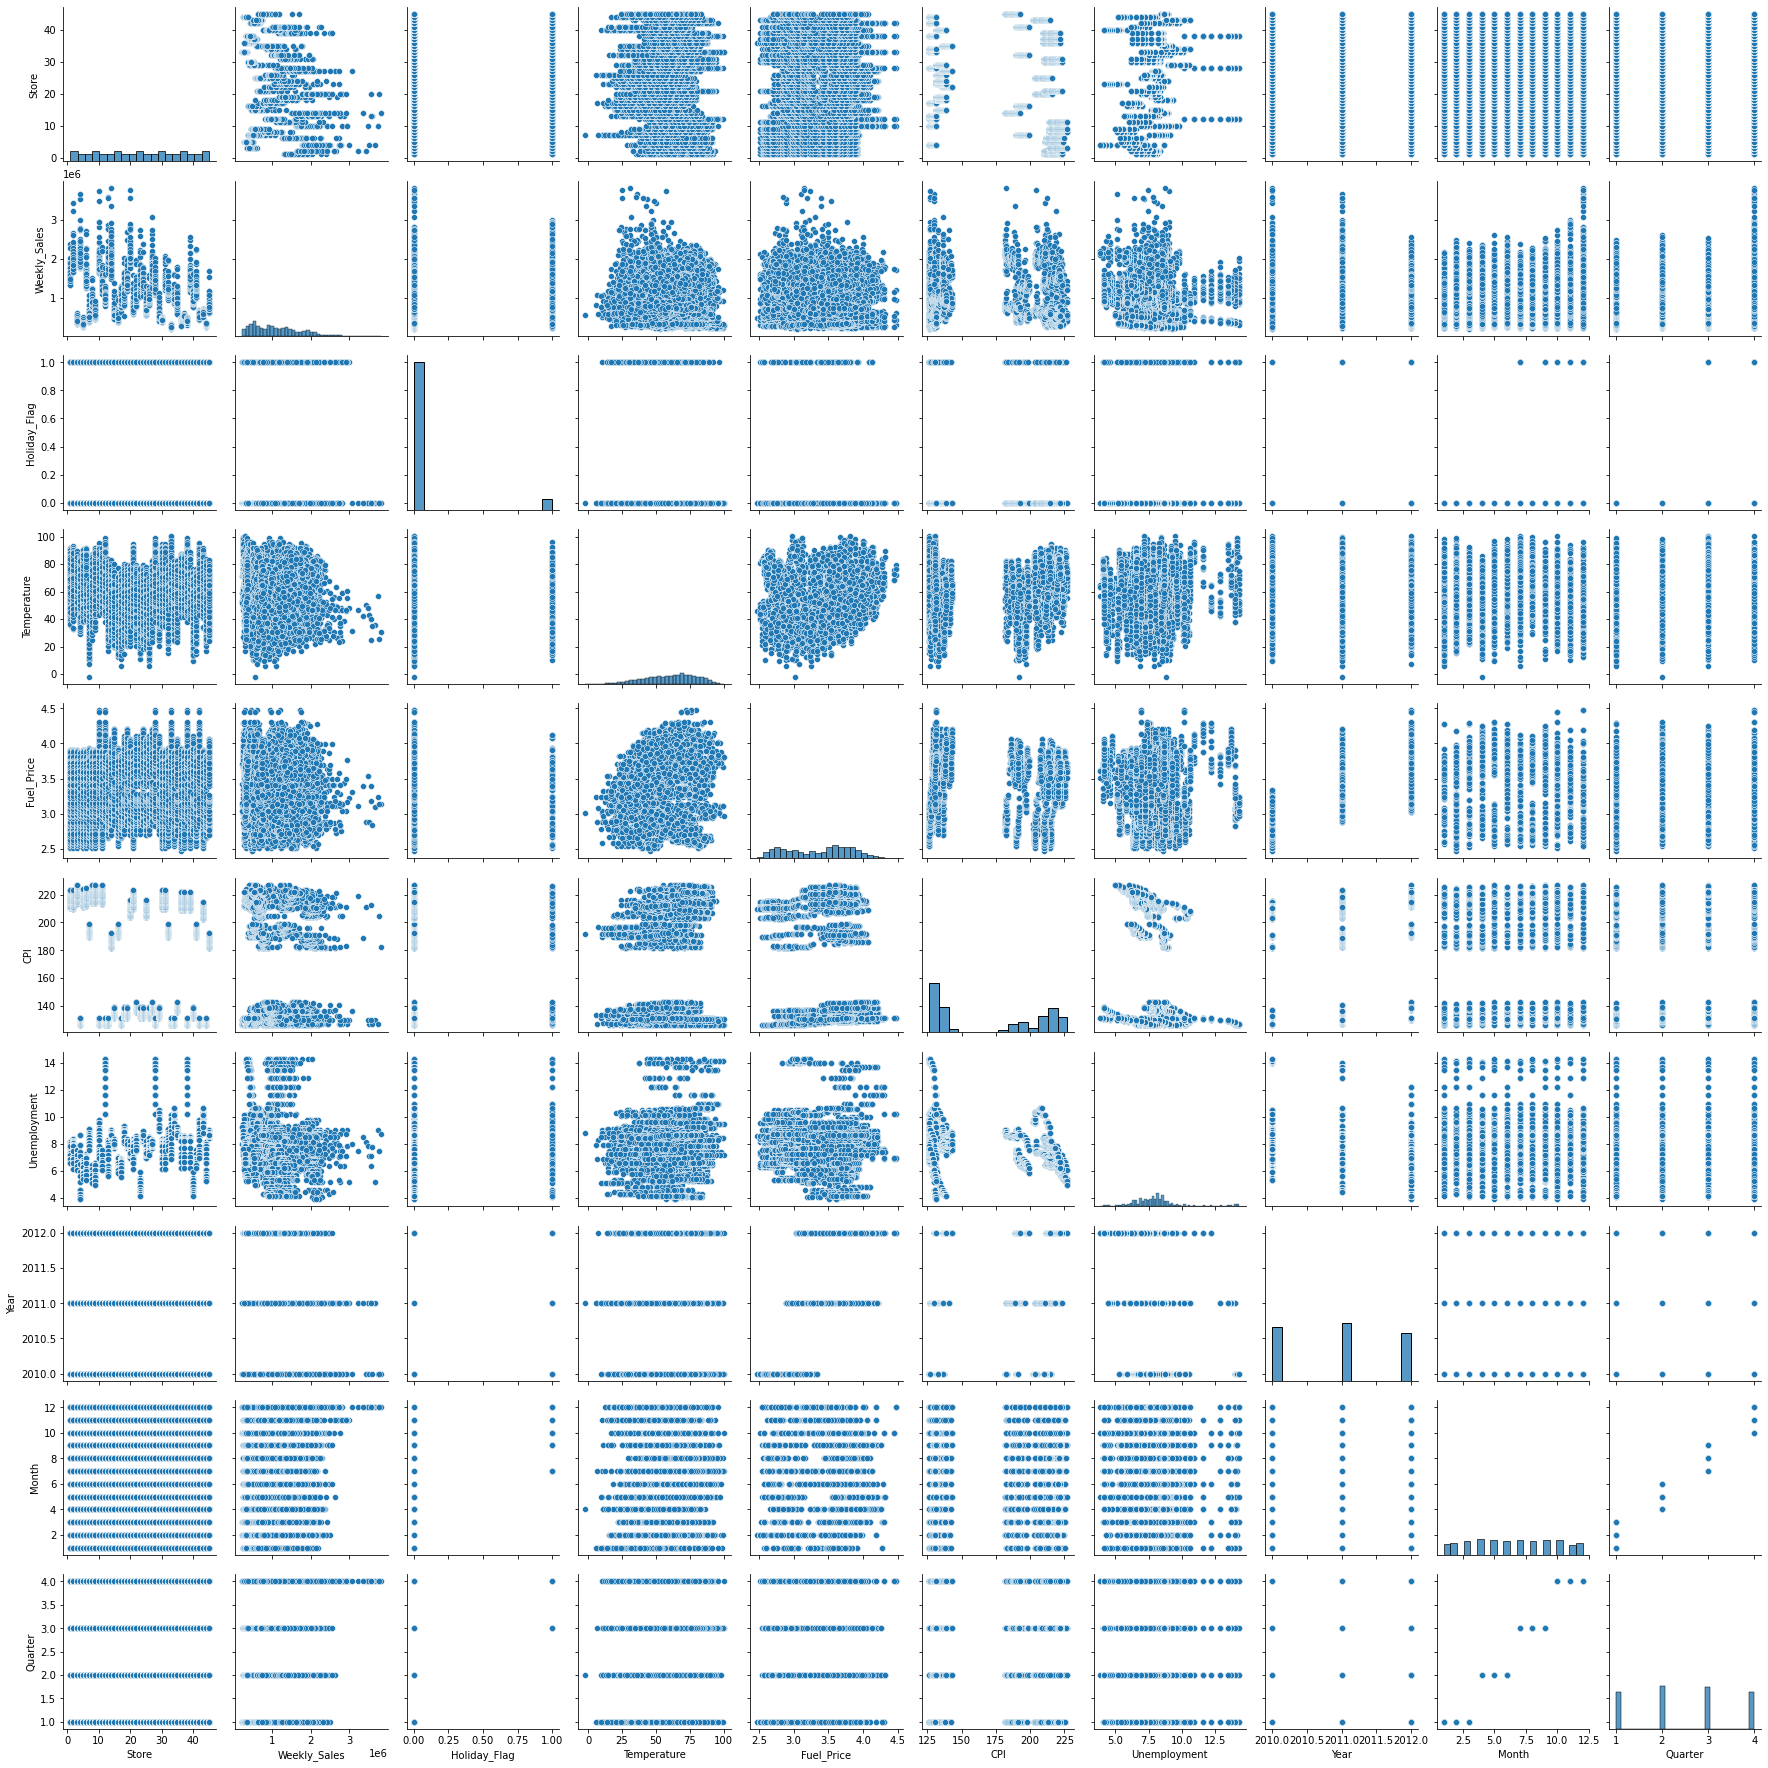

In [35]:
sns.pairplot(df)

### The above displayed graphs can be used to infer the various possibilities and analysis of each series of data present in the dataset 

# Plotting graph of the Store vs CPI

<AxesSubplot:xlabel='Store', ylabel='CPI'>

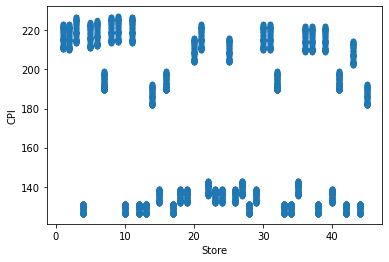

In [41]:
df.plot.scatter(x='Store',y='CPI')

### Above graph can be used to understand which stores have better CPI over the duration of time 

# Combined graph of all the various columns in the dataset

<AxesSubplot:>

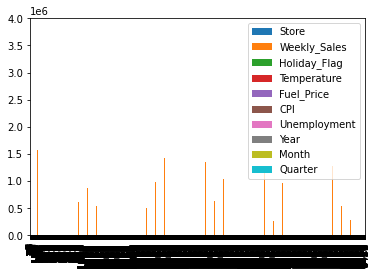

In [42]:
df.plot.bar()

### Since the values have huge ranging index most of the values are below the 0 in the axis thus the region there is mostly in black as all the various colours have been merged there

# # SUMMARY:

#### Unemployment Decreased over the years.
#### Maximum in the year 2010 & Minimum in the year 2012.



#### There was no Direct relation between Fuel Price and umeployement found.



#### Indirect relationship between Fuel Price and umeployement: 
####           2012 had the highest Fuel Price.
####           2012 had the lowest Unemployement percentage.



#### Fuel Price peaked at 2012 and lowest at 2010.



#### CPI increased gradually and steadily over the years.



#### The CPI remains constant throughout the Quarters:
#### Quarter 1 : 25%
#### Quarter 2 : 25%
#### Quarter 3 : 25%
#### Quarter 4 : 25%



#### Temperature is at peak in the months of February,July,August & October
#### Lowest tempeature can be observed in the month of April.


#### Unemployment is the same almost throughout the year.



#### The sales during the month of December is at the peak.
#### The lowest sales has been recorded during the month of January.


#### Stores 1-10 have better CPI compared to the other stores over the years.


#### There are a series of gaphs that have been plotted along with each series from the provided dataset thus it can be used to understand how each of them affect the others and how effective it can be considered.


#### The graphs with the region that has maximum concentraion is the region where the sales is more.